In [1]:
import pandas as pd
import sklearn
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



from ucimlrepo import fetch_ucirepo, list_available_datasets


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

from keras import layers

In [2]:

url = "https://archive.ics.uci.edu/static/public/45/data.csv"
df = pd.read_csv(url)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [5]:
# import dataset
heart_disease = fetch_ucirepo(id=45)

print(heart_disease.metadata.additional_info.summary)

# access variable info in tabular format
print(heart_disease.variables)

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
   
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database.  All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs" 
        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical 

In [6]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype=object)

In [7]:
df = df.dropna()

In [8]:
## Plot some features to find some correlations

In [9]:
nums_values = df['num'].value_counts()
nums_values

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

Text(0, 0.5, 'Count')

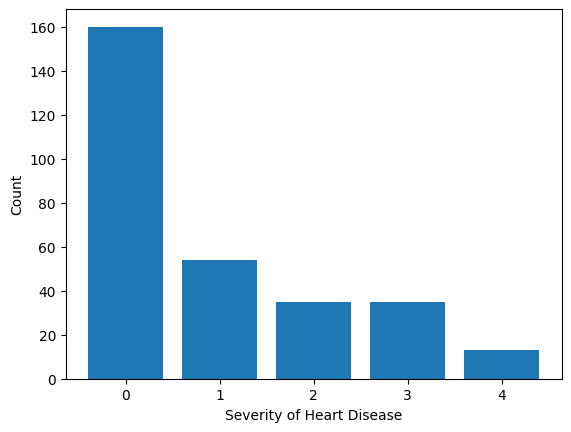

In [10]:
plt.bar(nums_values.index, nums_values.values)
plt.xlabel('Severity of Heart Disease')
plt.ylabel('Count')

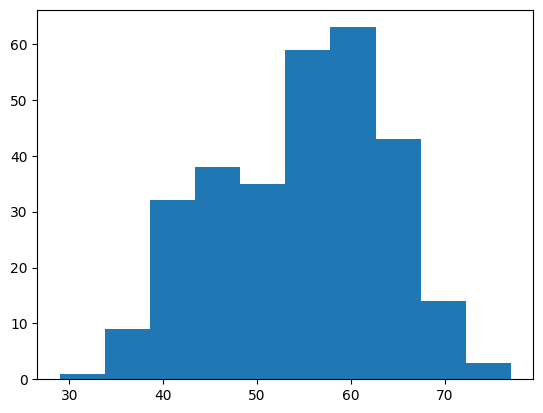

In [11]:
# histogram to show the age distribution of the whole dataset
histplot = plt.hist(df['age'])

<Axes: xlabel='age', ylabel='Count'>

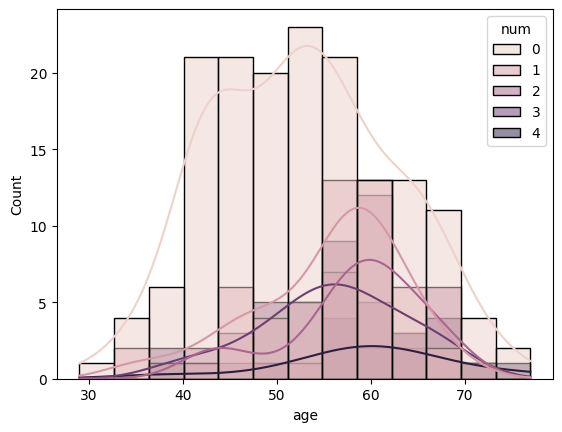

In [12]:
# histogram to show each num value is represented by age
sns.histplot(data = df, x='age', hue='num', kde = True)

The distribution of heart disease positively correlates with the age of the patient. The age range is ~ 30 - 75 with the majority of individuals ages around 60. 

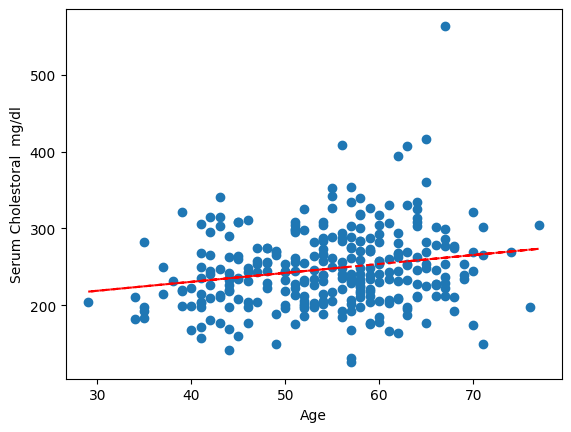

In [13]:
# Correlation between cholesterol levels and age

plt.scatter(df['age'], df['chol'])
plt.xlabel('Age')
plt.ylabel('Serum Cholestoral  mg/dl')

z = np.polyfit(df['age'], df['chol'], 1)
p = np.poly1d(z)

plt.plot(df['age'], p(df['age']), 'r--')


The trend line shows that there is a slight positive correlation between the age of the individual and there serum cholestoral.

Text(0, 0.5, 'Serum Cholestoral mg/dl')

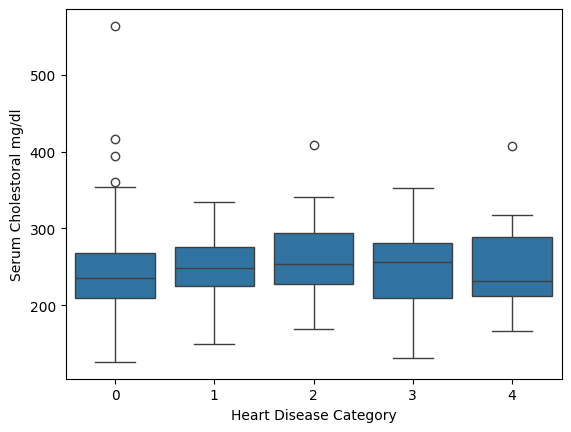

In [14]:
sns.boxplot(x=df['num'], y=df['chol'])
plt.xlabel('Heart Disease Category')
plt.ylabel('Serum Cholestoral mg/dl')



In [15]:
# Exposing the outliers in the Cholesterol feature

# defining quartiles
q1 = df['chol'].quantile(0.25)
q3 = df['chol'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR


outliers = df[(df['chol'] < lower_bound) | (df['chol'] > upper_bound)]
print(outliers)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
48    65    0   3       140   417    1        2      157      0      0.8   
121   63    0   4       150   407    0        2      154      0      4.0   
152   67    0   3       115   564    0        2      160      0      1.6   
173   62    0   4       140   394    0        2      157      0      1.2   
181   56    0   4       134   409    0        2      150      1      1.9   

     slope   ca  thal  num  
48       1  1.0   3.0    0  
121      2  3.0   7.0    4  
152      2  0.0   7.0    0  
173      2  0.0   3.0    0  
181      2  2.0   7.0    2  


In [16]:
# Cleaning the dataset by removing these outliers

df = df[(df['chol'] > lower_bound) & (df['chol'] < upper_bound)]

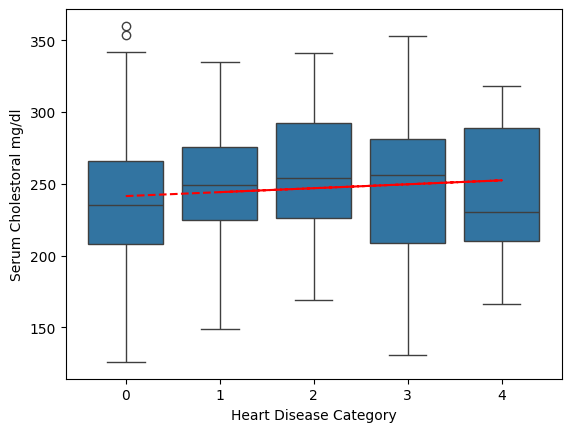

In [17]:
# Replotting the data without the outliers
sns.boxplot(x=df['num'], y=df['chol'])
plt.xlabel('Heart Disease Category')
plt.ylabel('Serum Cholestoral mg/dl')

z = np.polyfit(df['num'], df['chol'], 1)
p = np.poly1d(z)

plt.plot(df['num'], p(df['num']), 'r--')

In [18]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype=object)

Text(0, 0.5, 'maximum heart rate achieved')

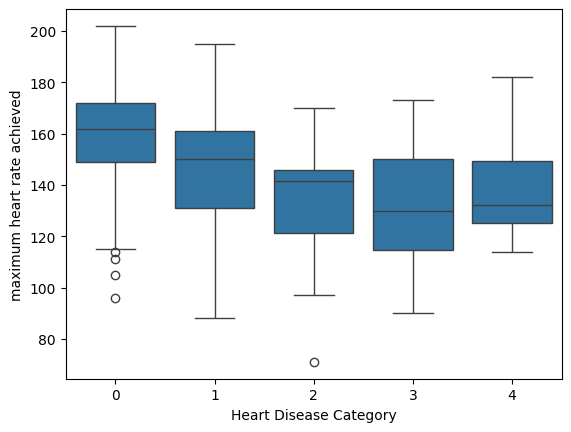

In [19]:
sns.boxplot(x=df['num'], y=df['thalach'])
plt.xlabel('Heart Disease Category')
plt.ylabel('maximum heart rate achieved')



sex
1    201
0     91
Name: count, dtype: int64


<Axes: xlabel='num', ylabel='Count'>

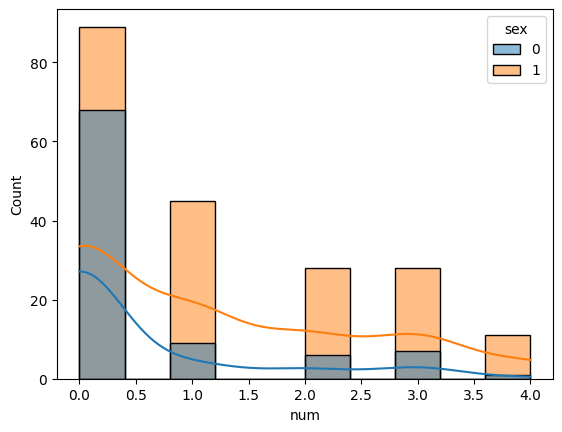

In [20]:
# histogram to show each num value is represented by sex
# sex (1 = male; 0 = female)
print(df['sex'].value_counts())
sns.histplot(data = df, x='num', hue='sex', kde = True)

The above analysis shows that the total dataset contains approx a male female ration of approx 2:1

The histogram shows that the proportion of males to females is not even throughout the num values, there is a higher proportion of females without heart disease and a higher proportion of males with heart disease. 

In [21]:
features =  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

for feature in features:
    correlation, _ = pearsonr(df['num'], df[feature])
    print(f'Pearson correlation for {feature}: {correlation:.2f}')

Pearson correlation for age: 0.23
Pearson correlation for sex: 0.24
Pearson correlation for cp: 0.40
Pearson correlation for trestbps: 0.15
Pearson correlation for chol: 0.07
Pearson correlation for fbs: 0.06
Pearson correlation for restecg: 0.18
Pearson correlation for thalach: -0.43
Pearson correlation for exang: 0.40
Pearson correlation for oldpeak: 0.49
Pearson correlation for slope: 0.38
Pearson correlation for ca: 0.51
Pearson correlation for thal: 0.51


Based upon this correlation analaysis is made sense to remove chol, fbs and trestbps as features in the classification model.

## Classification Models

In [35]:
def plot_cms(y_test, pred, y_test_bin, binary_predictions):
     
    cm = confusion_matrix(y_test, pred)
    cm_bin = confusion_matrix(y_test_bin, binary_predictions)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    fig.suptitle('Multiclass and Binary Confusion Matrices (Test Set)')

    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax1)
    ax1.set_title('Multiclass Predicitions')
    
    sns.heatmap(cm_bin, annot=True, fmt="d", cmap="Blues", ax=ax2)
    ax2.set_title('Binary predicitions')

    plt.show()


def evaluate_model(model, df, XGB=False):
    
    # multiclass classification
    X = df[['age', 'sex', 'cp', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
    y = df[['num']].to_numpy().ravel()

    # Binary Classification
    df.loc[:, 'Heart_Disease'] = df['num'].apply(lambda x: 0 if x == 0 else 1)
    print(df['Heart_Disease'].value_counts())
    y_bin = df[['Heart_Disease']].to_numpy().ravel()
    

    # multiclass
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15, random_state=42)

    # binary
    Xtrain_bin, Xtest_bin, ytrain_bin, ytest_bin = train_test_split(X, y_bin, test_size = 0.15, random_state = 42)


    # Scale the dataset
    scaler = StandardScaler()
    
    X_train_scaled = scaler.fit_transform(Xtrain)
    X_test_scaled = scaler.fit_transform(Xtest)
    
    X_train_bin_scaled = scaler.fit_transform(Xtrain_bin)
    X_test_bin_scaled = scaler.fit_transform(Xtest_bin)

    if XGB == True:
        model_m = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, num_class=len(np.unique(y)))
        model_b = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1)
        
        model_m = model_m.fit(X_train_scaled, ytrain)
        model_b = model_b.fit(X_train_bin_scaled, ytrain_bin)
    else:
        # fit multiclass and binary classification models
        model_m = model.fit(X_train_scaled, ytrain)
        model_b = model.fit(X_train_bin_scaled, ytrain_bin)

    

    # get predictions
    model_predictions = model_m.predict(X_test_scaled)
    binary_model_predictions = model_b.predict(X_test_bin_scaled)

    #multiclass accuracy
    train_acc = accuracy_score(ytrain, model_m.predict(X_train_bin_scaled))
    test_acc = accuracy_score(ytest, model_m.predict(X_test_scaled))

    print(f"Multiclass Training accuracy: {train_acc:.4f}")
    print(f"Multiclass Test accuracy: {test_acc:.4f}")

    # binary classification accuracy
    train_acc_bin = accuracy_score(ytrain_bin, model_b.predict(X_train_bin_scaled))
    test_acc_bin = accuracy_score(ytest_bin, model_b.predict(X_test_bin_scaled))

    print(f"Binary Training accuracy: {train_acc_bin:.4f}")
    print(f"Binary Test accuracy: {test_acc_bin:.4f}")

    

    plot_cms(ytest, model_predictions, ytest_bin, binary_model_predictions)


    return model_m, model_b
    
    

    

### Logistic Regression

Heart_Disease
0    157
1    135
Name: count, dtype: int64
Multiclass Training accuracy: 0.5887
Multiclass Test accuracy: 0.5682
Binary Training accuracy: 0.8548
Binary Test accuracy: 0.8636


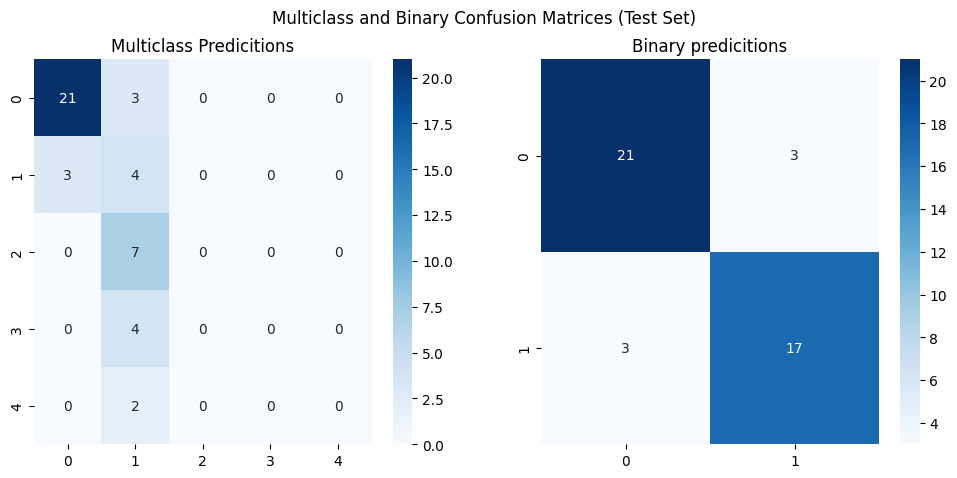

In [36]:
# Logistic regression

logistic_regressor = LogisticRegression(max_iter=500)

log_m, log_b = evaluate_model(logistic_regressor, df)

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Heart_Disease
0    157
1    135
Name: count, dtype: int64
Multiclass Training accuracy: 0.5968
Multiclass Test accuracy: 0.5227
Binary Training accuracy: 0.8508
Binary Test accuracy: 0.8182


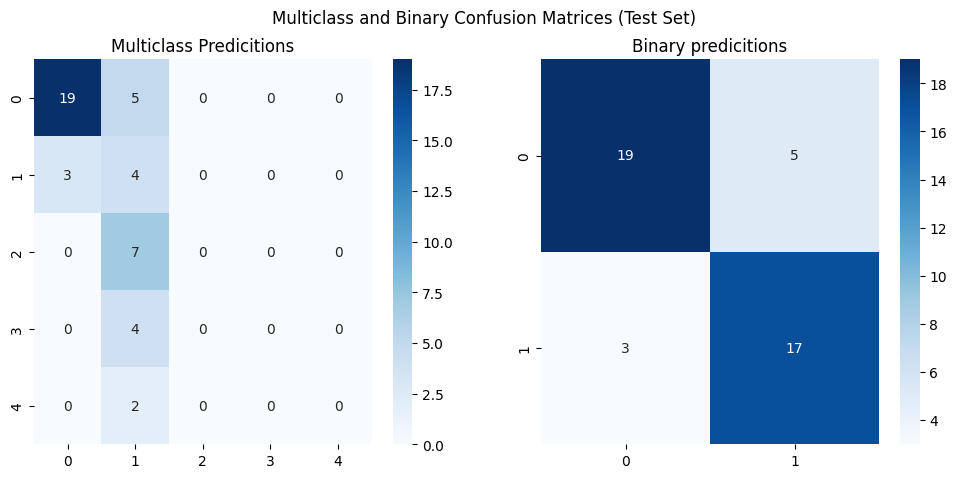

Tree Depth: 5
Number of Leaves: 13
Tree Depth: 5
Number of Leaves: 13


In [38]:
tree = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=10, random_state=42)

tree, bin_tree = evaluate_model(tree, df)

print(f"Tree Depth: {tree.get_depth()}")
print(f"Number of Leaves: {tree.get_n_leaves()}")

print(f"Tree Depth: {bin_tree.get_depth()}")
print(f"Number of Leaves: {bin_tree.get_n_leaves()}")

### Random Forrest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
forest = RandomForestClassifier(n_estimators=125, max_depth = 5, max_features=10)


Heart_Disease
0    157
1    135
Name: count, dtype: int64
Multiclass Training accuracy: 0.6774
Multiclass Test accuracy: 0.5455
Binary Training accuracy: 0.9516
Binary Test accuracy: 0.8409


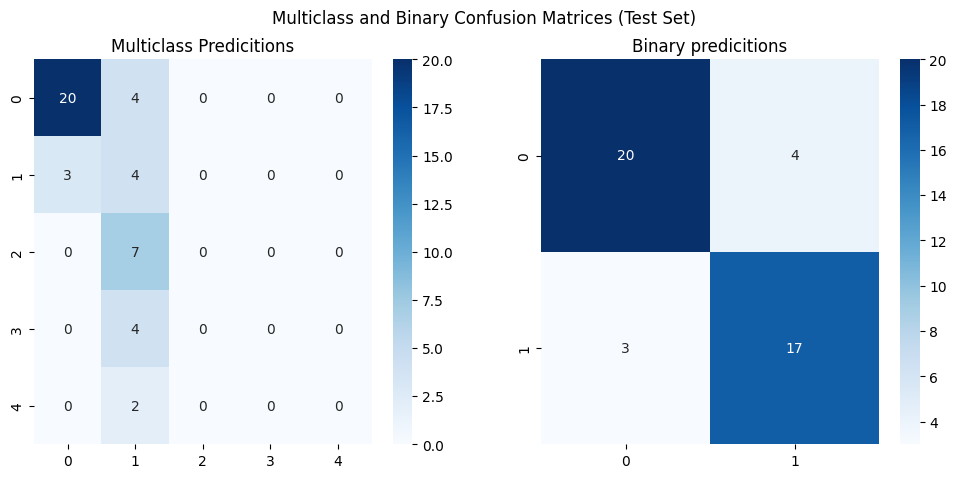

(RandomForestClassifier(max_depth=5, max_features=10, n_estimators=125),
 RandomForestClassifier(max_depth=5, max_features=10, n_estimators=125))

In [60]:
evaluate_model(forest, df)

### XG Boost

In [42]:
import xgboost
from xgboost import XGBClassifier

Heart_Disease
0    157
1    135
Name: count, dtype: int64
Multiclass Training accuracy: 0.6815
Multiclass Test accuracy: 0.5455
Binary Training accuracy: 0.8387
Binary Test accuracy: 0.8182


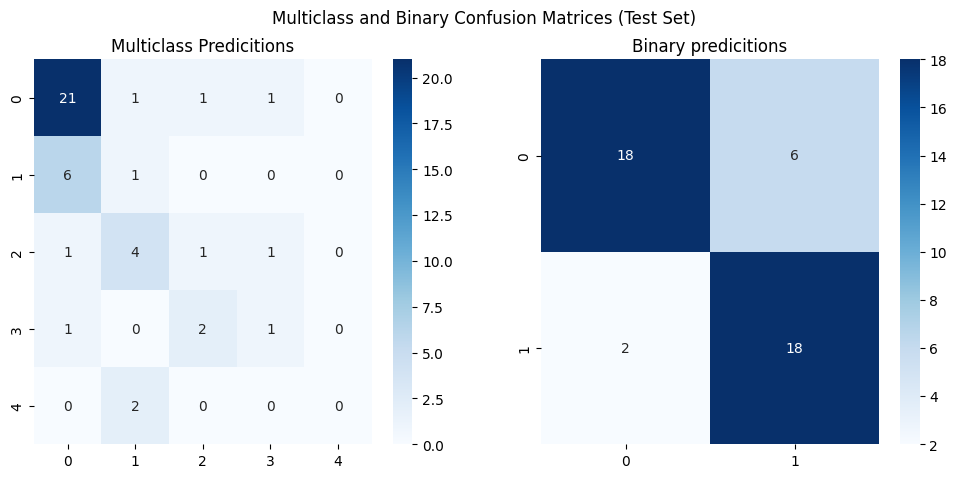

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=2, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=2, n_jobs=None, num_class=5,
               num_parallel_tree=None, ...),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, e

In [43]:
xgb = XGBClassifier()
evaluate_model(xgb, df, XGB=True)

### TF Neural Network

In [44]:
import tensorflow as tf
from keras import layers

In [45]:
# an altered version of the evaluate model to accomodate changing last layer of nn (I need to redo the original)

def evaluate_nn(df):
    # Multiclass
    X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
    y = df[['num']].to_numpy().ravel() # 0-4

    # Binary
    df.loc[:, 'Heart_Disease'] = df['num'].apply(lambda x: 0 if x == 0 else 1)
    print(df['Heart_Disease'].value_counts())
    y_bin = df[['Heart_Disease']].to_numpy().ravel()

    # Split for multiclass and binary classification
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15, random_state=42)
    Xtrain_bin, Xtest_bin, ytrain_bin, ytest_bin = train_test_split(X, y_bin, test_size=0.15, random_state=42)

    # Scale the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(Xtrain)
    X_test_scaled = scaler.transform(Xtest)
    X_train_bin_scaled = scaler.fit_transform(Xtrain_bin)
    X_test_bin_scaled = scaler.transform(Xtest_bin)

    # --- Multiclass Model ---
    multiclass_model = tf.keras.Sequential([
        layers.Dense(16, activation='relu', input_dim=X_train_scaled.shape[1]),
        layers.Dense(8, activation='relu'),
        layers.Dense(len(np.unique(y)), activation='softmax')  # Output layer for multi-class classification
    ])

    multiclass_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    multiclass_model.fit(X_train_scaled, ytrain, epochs=60, batch_size=32, verbose=0)
    multiclass_predictions = multiclass_model.predict(X_test_scaled)

    # Multiclass accuracy
    train_acc = accuracy_score(ytrain, multiclass_model.predict(X_train_scaled).argmax(axis=1))
    test_acc = accuracy_score(ytest, multiclass_model.predict(X_test_scaled).argmax(axis=1))
    print(f"Multiclass Training accuracy: {train_acc:.4f}")
    print(f"Multiclass Test accuracy: {test_acc:.4f}")

    # --- Binary Model ---
    binary_model = tf.keras.Sequential([
        layers.Dense(16, activation='relu', input_dim=X_train_bin_scaled.shape[1]),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')  
    ])

    
    binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    binary_model.fit(X_train_bin_scaled, ytrain_bin, epochs=60, batch_size=32, verbose=0)
    binary_predictions = binary_model.predict(X_test_bin_scaled)

    # Binary accuracy
    train_acc_bin = accuracy_score(ytrain_bin, (binary_model.predict(X_train_bin_scaled) > 0.5).astype(int))
    test_acc_bin = accuracy_score(ytest_bin, (binary_model.predict(X_test_bin_scaled) > 0.5).astype(int))
    print(f"Binary Training accuracy: {train_acc_bin:.4f}")
    print(f"Binary Test accuracy: {test_acc_bin:.4f}")

    # Plot CMs
    plot_cms(ytest, multiclass_predictions.argmax(axis=1), ytest_bin, (binary_predictions > 0.5).astype(int))

    return multiclass_model, binary_model


Heart_Disease
0    157
1    135
Name: count, dtype: int64


C:\Users\tom_r\anaconda3\envs\Data_Science\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Multiclass Training accuracy: 0.7258
Multiclass Test accuracy: 0.5000


C:\Users\tom_r\anaconda3\envs\Data_Science\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Binary Training accuracy: 0.8871
Binary Test accuracy: 0.7955


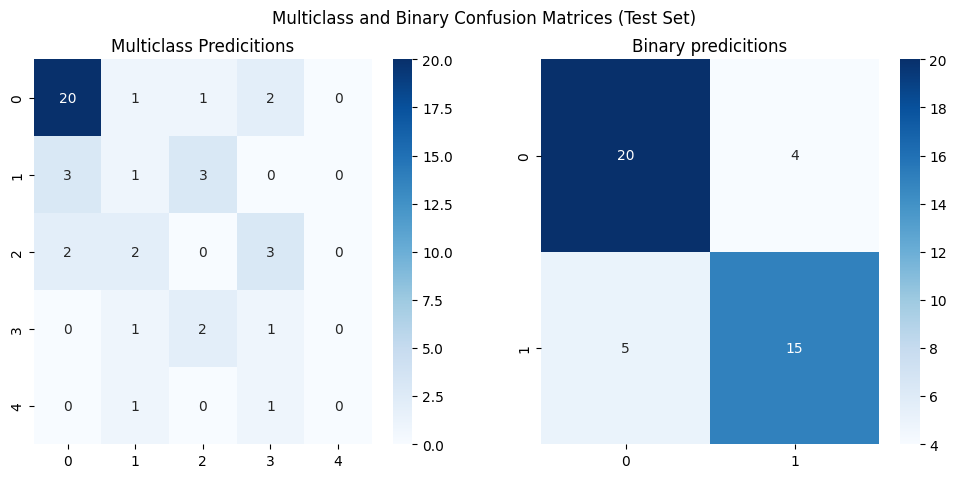

In [46]:
m, b = evaluate_nn(df)